In [36]:
#import Library
import random
import math
import matplotlib.pyplot as plt 
import numpy as np

In [37]:
# Counting how many ministers threaten each other
def Value(table):
    menace = 0
    for i in range(8):
        for j in range(i+1, 9):
            #If they are in the same row, or if the absolute value of the slope between these two ministers is 1, increase menace
            if table[i] == table[j] or abs(table[i] - table[j]) /  (j - i) == 1:
                menace += 1
    # Since value is important to us, the fewer threats the better, so we multiply threats by minus 1.            
    return menace*-1

In [38]:
#Print the tables and write under each picture whether this answer is safe or not
def PrintTable(solution):
    table = []
    for i in range(9):
        r = []
        for j in range(9):
            if solution[i] == j:
                r.append(1)
            else:
                r.append(0)
        table.append(r)

    resulte = "Ministers threaten each other" 
    # if Value solution==0 then    Ministers do not threaten each other     else     Ministers threaten each other
    if not Value(solution):
        resulte = "Ministers do not threaten each other"

    plt.matshow(np.array(table) , cmap='binary')
    plt.text(1 , 10 , resulte)
    plt.show()

In [39]:
#Choosing a random neighbor from among several neighbors
def ChooseRandom(current):
    neighbors = []
    while len(neighbors) < 10:
        #Generate two random numbers
        n = random.randint(0, 8)
        m = random.randint(0, 8)
        #If two numbers are the same, it has no effect on moving two ministers (this like Swap(1,1) and we did nothing) and we have to generate a random number again.
        if n==m:
            continue
        #Copy the original array into temp
        temp = current.copy()
        # Swaping
        t = temp[m]
        temp[m] = temp[n]
        temp[n] = t
        #If this neighbor has not been generated before, add it to the array
        if temp not in neighbors:
            neighbors.append(temp)
    k = random.randint(0, 9)
    return neighbors[k] 

In [40]:
def Map_time_to_temperature(t):
    #A function that is descending and gradually decreases with the increase of t (time).
    T = 1/(t*2+1) * 100
    #This function never becomes zero (very close to zero but not zero), so if it falls below a certain limit, we consider it equal to zero.
    if T<=0.1:
        T = 0
    return T    

In [41]:
def SimulatedAnnealing():
    # Generate [0, 1, 2, 3, 4, 5, 6, 7, 8]
    current = list(range(9))
    #Shuffle the elements of this arr
    random.shuffle(current)    
    # To count steps
    flag = 0

    for t in range(int(2e18)): # t range : 0 to infinity
        flag=flag+1
        temperature = Map_time_to_temperature(t)
        # If the temperature drops to zero, the functions will stop!
        if temperature == 0:
            return current , flag
        # Choosing a random neighbor according to the current presentation
        next = ChooseRandom(current=current)
        # Calculate the difference
        Delta = Value(next) - Value(current)
        # If the status of the neighbor is better than the current status, we will put the neighbor in the current
        if Delta > 0:
            current = next

        else:
            # Otherwise, we will put this(next) in the current with a possibility
            probability = math.exp((Delta) / temperature)
            if random.random() < probability:
                current = next

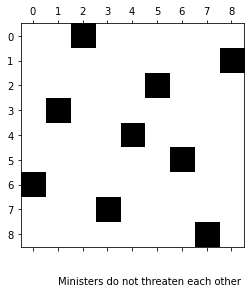

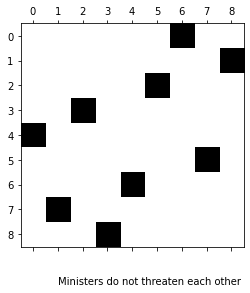

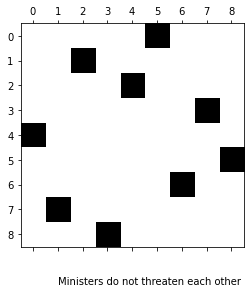

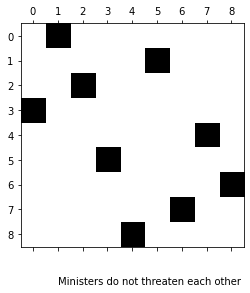

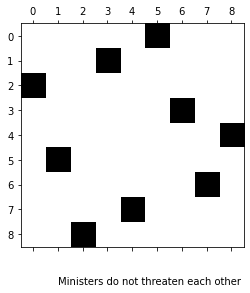

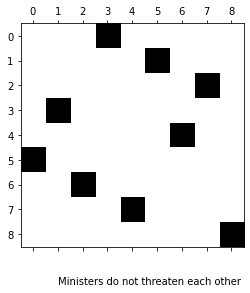

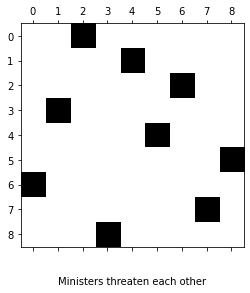

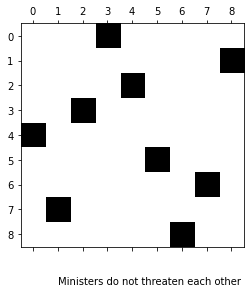

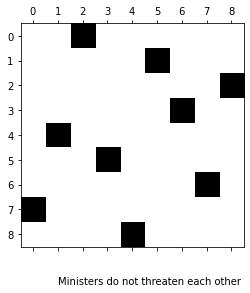

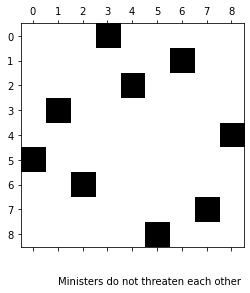

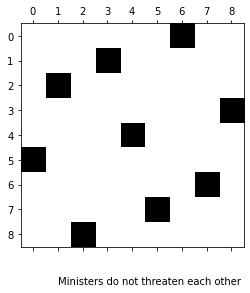

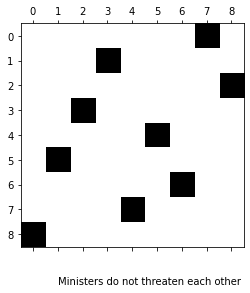

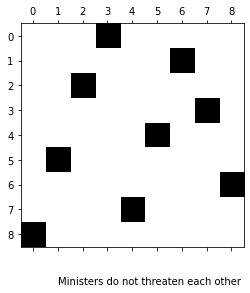

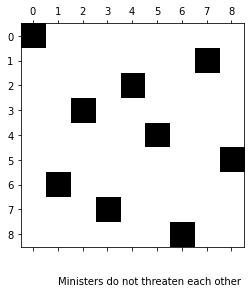

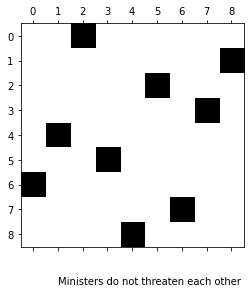

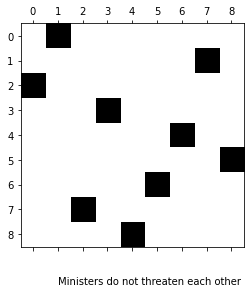

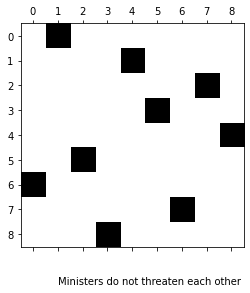

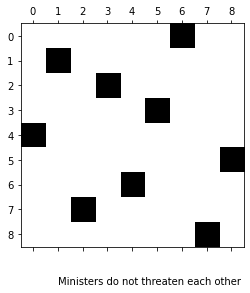

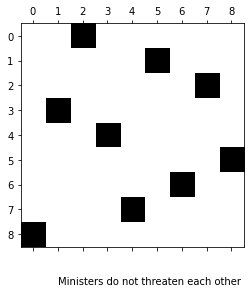

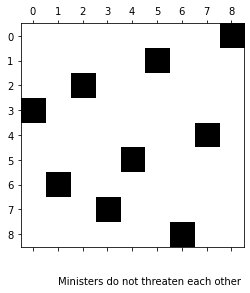

Success rate:  95.0 %
Average number of steps to find the answer:  501


In [42]:
cnt = 0 # To count the correct states
sum_cnt = 0 # Total number of steps to find the answer
for _ in range(20):
    solution , flag = SimulatedAnnealing()
    if Value(solution) == 0:
            cnt += 1
            sum_cnt+=flag
    PrintTable(solution)

print("Success rate: ", cnt/20 * 100, "%")
print("Average number of steps to find the answer: " , math.ceil(sum_cnt/cnt))